<a href="https://colab.research.google.com/github/Rahmaatef2001/W2022/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Rahma Atef Abdelhamid

ID: 49-12703

Tutorial: T08

---

Name: zahra Khaled shaker

ID: 49-5956

Tutorial: T08



## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.info()
#needed to know the data type for each attribute to know which need to be changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
df['sellingprice'] = df['sellingprice'].str.extract('([0,-99999999999999]+)', expand=False).str.strip()
df['mmr'] = df['mmr'].str.extract('([0,-99999999999999]+)', expand=False).str.strip()
df['odometer'] = df['odometer'].str.extract('([0,-99999999999999]+)', expand=False).str.strip()
df['sellingprice'] = df['sellingprice'].interpolate().astype(float)
df['mmr'] = df['mmr'].interpolate().astype(float)
df['odometer'] = df['odometer'].interpolate().astype(float)
#all of the above were numaric numbers that had the datatype object do we had to type cast them but first we removied the $ sign and the mi
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,28700.0,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675.0,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500.0,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,—,gray,wheels exchange llc,15650.0,17000.0,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350.0,21500.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200.0,22000.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400.0,13800.0,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
temp=df['interior'].mode()[0]
temp
df['interior']=df['interior'].replace('—', temp)
#we tried to clean the data from all the emaning less values and put the most commen element in the colmun
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,28700.0,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675.0,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500.0,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,—,gray,wheels exchange llc,15650.0,17000.0,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350.0,21500.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200.0,22000.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400.0,13800.0,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
df.interior.unique()

array(['gray', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

In [ ]:
df.color.unique()

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', '—', 'yellow', 'brown',
       'turquoise', 'orange', 'off-white', 'charcoal', 'pink', 'lime'],
      dtype=object)

In [ ]:
temp=df['color'].mode()[0]
temp
df['color']=df['color'].replace('—', temp)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,28700.0,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675.0,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500.0,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,black,gray,wheels exchange llc,15650.0,17000.0,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350.0,21500.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200.0,22000.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400.0,13800.0,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
df.model.unique()

array(['Sonata', '4Runner', 'IS 250', 'X5', 'E-Series Van', 'Optima',
       'Avalanche', 'CTS', 'E-Class', 'Forte', 'Wrangler', 'G Sedan',
       'MKS', 'Soul', 'Ranger', 'Mazda6', 'Tundra', 'PT Cruiser',
       'Acadia', 'Mustang', 'Odyssey', 'X3', 'STS', 'F-150', 'Sienna',
       'Liberty', 'DTS', 'Sebring', 'Nitro', 'Tacoma', 'Elantra', 'Q7',
       'Maxima', 'Corvette', 'Grand Cherokee', 'FJ Cruiser', 'Fiesta',
       'Genesis', 'Town and Country', 'F-350 Super Duty', 'Z4', 'Murano',
       'Enclave', 'Altima', 'Sentra', 'R-Class', 'Sierra 1500', 'Cooper',
       'XJ', 'Edge', 'Focus', 'Avenger', 'Civic', 'Escape', 'Camry',
       'Encore', 'Accord', 'Sonic', 'Yukon', 'XF', 'Savana Cargo',
       'Fusion', '200', 'Cruze', 'MKX', 'Stratus', 'S60', 'Taurus',
       'Corolla', 'CR-V', 'Tucson', 'Charger', 'Lancer', 'Malibu',
       'Mazda3', 'Jetta', 'Elantra GT', '3 Series', 'Leaf',
       'Express Cargo', 'Outlander Sport', 'Venza', 'F-250 Super Duty',
       'Versa', 'Rogue', 'Imp

In [ ]:
df.trim.unique()

array(['GLS', 'SR5', 'Base', ..., 'Base PZEV', 'Natural Gas',
       '10th Anniversary'], dtype=object)

In [ ]:
df.body.unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

In [ ]:
df.vin.unique()

array(['5npeb4acxdh702805', 'jtezu5jr2e5064567', 'jthbf5c24c5168599', ...,
       'wba3a5c56df356614', '4t1bf1fk8du254684', 'knadm4a32d6164825'],
      dtype=object)

In [ ]:
df.state.unique()

array(['ma', 'fl', 'wa', 'co', 'ca', 'il', 'nv', 'mo', 'tx', 'ne', 'md',
       'nj', 'la', 'ny', 'nc', 'ut', 'va', 'ga', 'tn', 'oh', 'ms', 'pa',
       'or', 'mi', 'wi', 'az', 'pr', 'mn', 'in', 'hi', 'sc', 'ok', 'nm',
       'al'], dtype=object)

In [ ]:
df.condition.unique()

array([3.9, 4.9, 4.1, 1.9, 4.6, 3.6, 1.7, 5. , 4.4, 2.7, 1. , 4.2, 2.5,
       3.5, 4. , 3. , 3.1, 2.4, 4.7, 4.5, 3.3, 2.9, 3.4, 2.8, 2.1, 4.3,
       2.3, 3.7, 3.2, 2. , 2.2, 2.6, 3.8, 4.8, 1.4, 1.6, 1.1, 1.8, 1.3,
       1.5, 1.2])

In [ ]:
df.odometer.unique()

array([50404., 17846., 21122., ..., 45357., 43376., 49953.])

In [ ]:
df.seller.unique()

array(['the hertz corporation', 'award auto sales and leasing inc',
       'lexus financial services', ..., 'bmw of fresno',
       'my mint car corp', 'carter federal credit union'], dtype=object)

In [ ]:
df.mmr.unique()

array([11000., 28700., 22200., ..., 51500., 57900., 94000.])

In [ ]:
df.sellingprice.unique()

array([1.0900e+04, 2.9900e+04, 2.4200e+04, 3.2000e+03, 2.2100e+04,
       1.5500e+04, 1.3600e+04, 1.4700e+04, 2.0000e+04, 2.7500e+04,
       2.2250e+04, 2.3700e+04, 1.2000e+04, 3.7000e+03, 5.5000e+03,
       7.3000e+03, 8.0000e+02, 1.8000e+04, 1.2500e+04, 8.9000e+03,
       3.6500e+04, 5.9000e+03, 1.6300e+04, 1.7800e+04, 8.3000e+03,
       3.0000e+03, 7.0000e+02, 5.1000e+03, 2.3000e+04, 9.1000e+03,
       4.0250e+04, 1.7900e+04, 5.1000e+04, 2.0600e+04, 1.2900e+04,
       9.2000e+03, 1.9600e+04, 1.8900e+04, 2.5000e+04, 8.6000e+03,
       2.0900e+04, 2.8750e+04, 3.1700e+04, 1.1900e+04, 1.2500e+03,
       6.7000e+03, 8.2000e+03, 2.8000e+03, 2.7000e+04, 2.1300e+04,
       9.5000e+03, 1.3200e+04, 1.1400e+04, 8.7000e+03, 1.1200e+04,
       1.3700e+04, 1.7000e+04, 2.2300e+04, 5.2000e+03, 3.4000e+03,
       1.9800e+04, 1.1000e+03, 1.9000e+04, 7.5000e+03, 2.1000e+03,
       1.9300e+04, 1.2800e+04, 8.0000e+03, 1.1600e+04, 1.3900e+04,
       9.0000e+03, 8.4000e+03, 4.8000e+03, 1.5700e+04, 1.5000e

In [ ]:
df.color.unique()

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', 'yellow', 'brown', 'turquoise',
       'orange', 'off-white', 'charcoal', 'pink', 'lime'], dtype=object)

In [ ]:
df.make.unique()

array(['Hyundai', 'Toyota', 'Lexus', 'BMW', 'Ford', 'Kia', 'Chevrolet',
       'Cadillac', 'Mercedes-Benz', 'Jeep', 'Infiniti', 'Lincoln',
       'Mazda', 'Chrysler', 'GMC', 'Honda', 'Dodge', 'Audi', 'Nissan',
       'Buick', 'MINI', 'Jaguar', 'Volvo', 'Mitsubishi', 'Volkswagen',
       'Subaru', 'Porsche', 'Isuzu', 'Saturn', 'Pontiac', 'Scion',
       'Acura', 'Ram', 'Land Rover', 'Suzuki', 'Mercury', 'HUMMER',
       'Saab', 'Maserati', 'FIAT', 'Geo', 'smart', 'Oldsmobile', 'Fisker',
       'Bentley', 'Plymouth', 'Ferrari', 'Aston Martin'], dtype=object)

In [ ]:
df.year.unique()

array([2013, 2014, 2012, 2002, 2007, 2008, 2011, 2015, 2010, 2005, 2006,
       2009, 2004, 1998, 2001, 2003, 1996, 1997, 2000, 1999, 1995, 1991,
       1990, 1994, 1993, 1992])

In [ ]:
#taking care of case sencitive
df['body'] = df['body'].str.capitalize()



In [ ]:
# reducing the unique values for body
df['body']=df['body'].replace("Suv", "SUV")
df['body']=df['body'].replace(["Crew cab","Regular cab","Double cab","Supercab","King cab","Quad cab","Crewmax cab", "Club cab", "Access cab","Cab plus 4","Mega cab","Regular-cab",
       "Xtracab","Extended cab","Supercrew"], "pickup trucks")
df['body']=df['body'].replace(["Cts wagon","Tsx sport wagon"], "Wagon")
df['body']=df['body'].replace(["G coupe","Genesis coupe","Elantra coupe","Cts-v coupe","Q60 coupe","Cts coupe"], "Coupe")
df['body']=df['body'].replace(["G sedan"], "Sedan")
df['body']=df['body'].replace(["G convertible", "Beetle convertible", "G37 convertible","Q60 convertible","Granturismo convertible"], "Convertible")
df['body']=df['body'].replace(["E-series van","Van","Promaster cargo van","Transit van"], "Minivan")
df['body']=df['body'].replace(["Koup"], "Hatchback")
df


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,28700.0,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675.0,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500.0,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,black,gray,wheels exchange llc,15650.0,17000.0,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,Sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350.0,21500.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200.0,22000.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400.0,13800.0,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
# unique values of body
df['body'].unique()

array(['Sedan', 'SUV', 'Minivan', 'pickup trucks', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

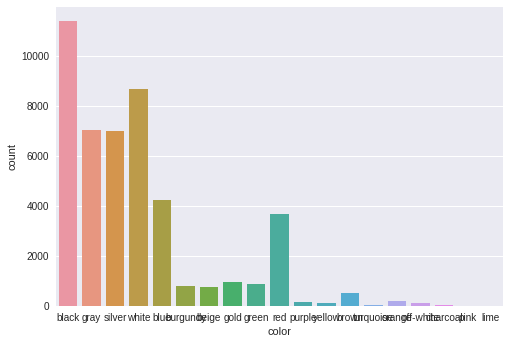

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

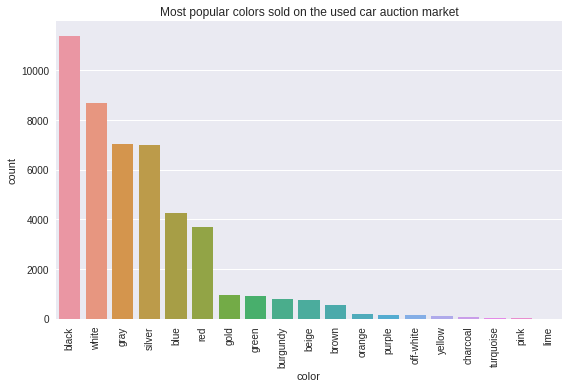

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

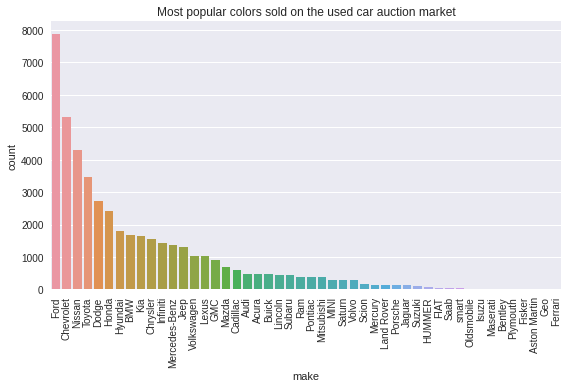

In [ ]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular brands sold ')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: The most popular brands are Ford, Chevrolet and Nissan as they were sold the most  in the given data so thats an indicator that they are the most popular cars.

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

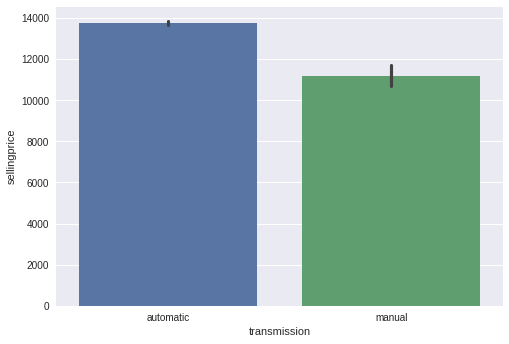

In [ ]:
 #Draw a bar plot showing the selling price of each of the transmission categories
sns.barplot(data=df, x="transmission", y="sellingprice")

**Answer for Q2**: yes automatic cars are sold on average for a higher price as we can see frrom the graph that the mean for acutomatic cars is higher.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

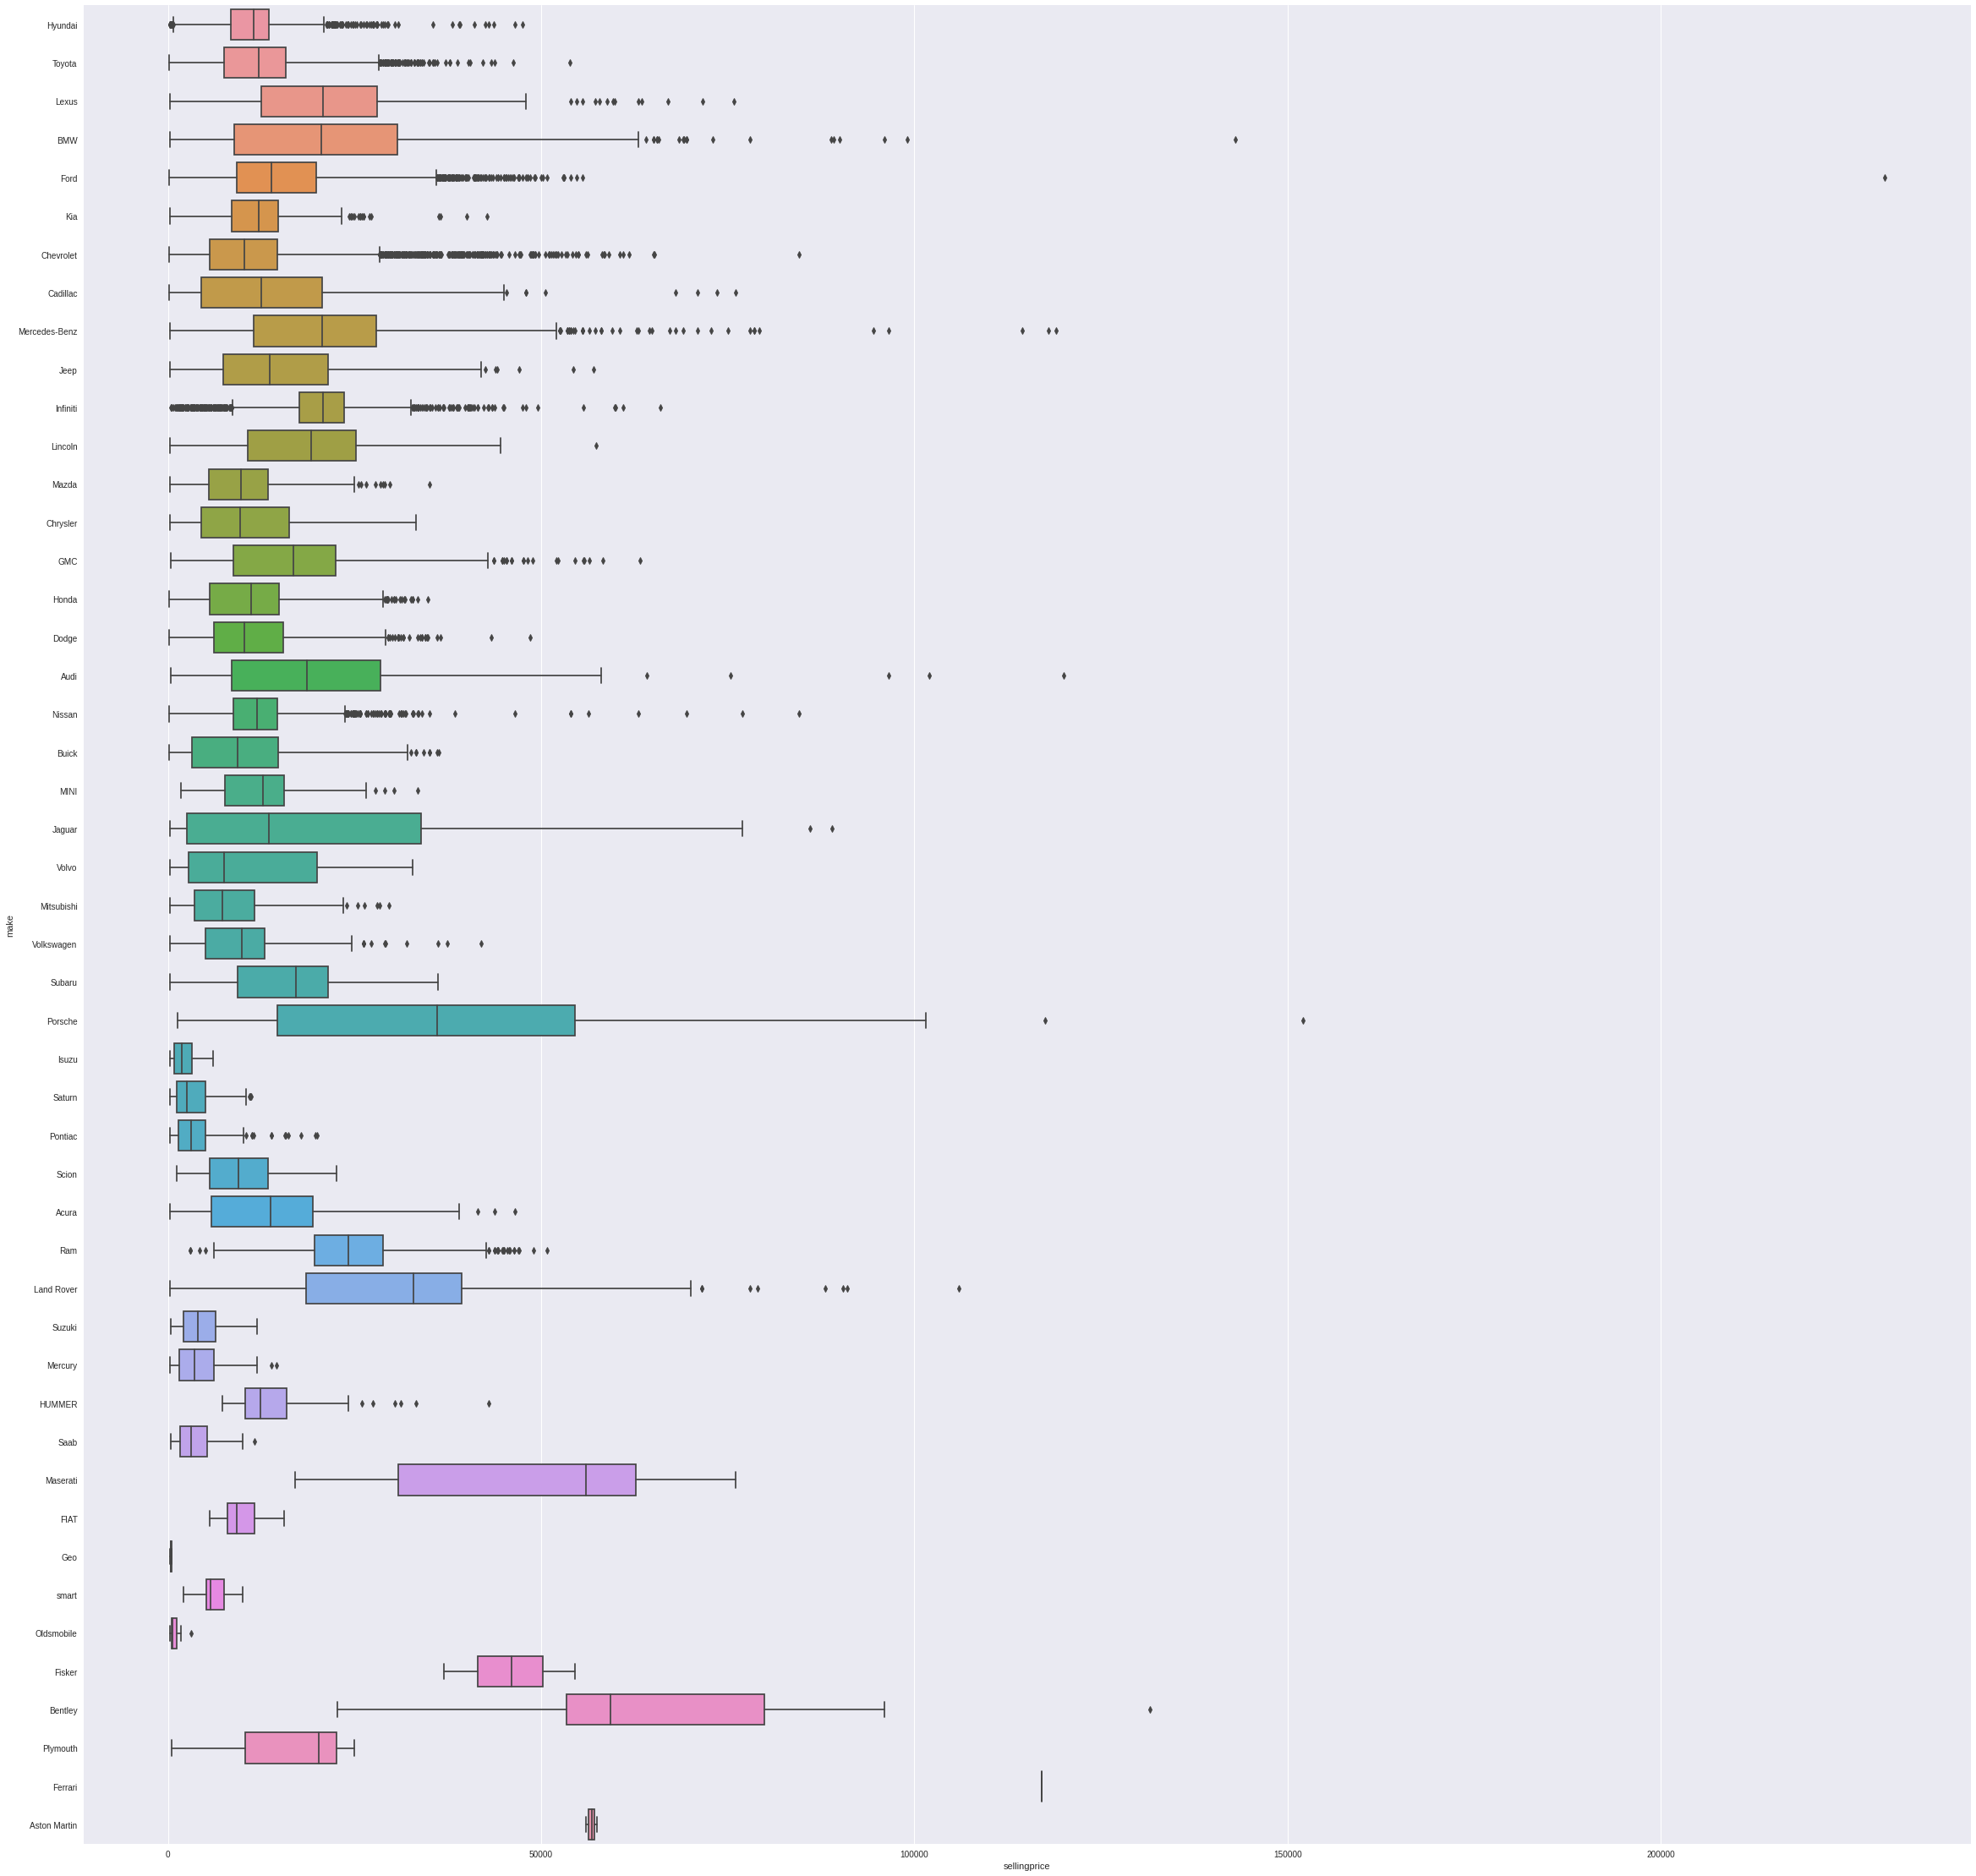

In [ ]:
f = plt.figure(figsize=(40,40))
sns.boxplot(data=df, x="sellingprice", y="make")


**Answer for Q3**: the cars that have widest distribution of selling price are porche and Jaguar as they have the highest diffrence between their lower value and the upper value. The most expencive cars are porche and Bentley as they have the highest upper value.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

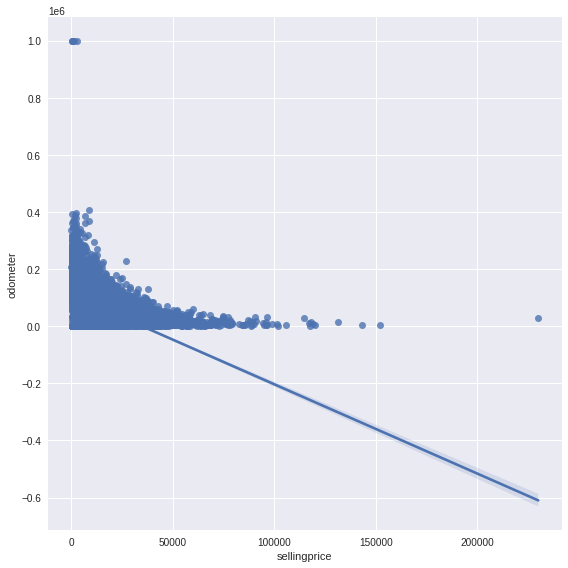

In [ ]:
sns.lmplot(x='sellingprice', y='odometer', data=df, height=8)

**Answer for Q4**:  The correlation between the selling price and the odometer is strong as it have high slop and also it's nigativly correlated meaning by the decrise of the odometer value there will be an increase in the selling price for the car.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

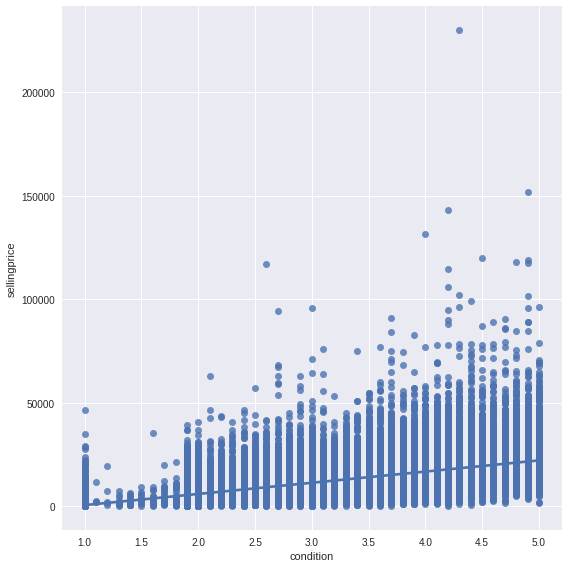

In [ ]:
sns.lmplot(x='condition', y='sellingprice', data=df, height=8)

**Answer for Q5**: The correlation between the selling price and the condition is weak as the slop of the best fitted line is small but the slop is positive which means its a weak positive correlation.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

In [ ]:
temp = df[['sellingprice','body']].groupby('body').mean().sort_values('sellingprice').index
#df.sort_values('sellingprice').body

In [ ]:
df[['sellingprice']]

,sellingprice
0,10900.0
1,29900.0
2,24200.0
3,3200.0
4,22100.0
...,...
46573,17000.0
46574,21500.0
46575,22000.0
46576,13800.0


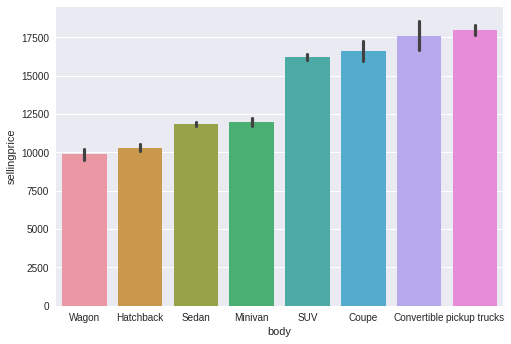

In [ ]:
sns.barplot(data=df, x="body", y="sellingprice", order=temp)

# drawing a bar plot between the brand and the selling price and ordering it on the average of the selling prices per brand

**Answer for Q6**: yes there are differences in the average car price due to the car's body type. the most expensive are the pickup trucks and the least expoensive are the wagon cars.


## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
#categorical_columns = ['trim','transmission', 'body','make','model']
categorical_columns = ['transmission', 'body','make','model']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

numerical_columns = ['odometer','condition']
#here we started to list the related  independent variables to be able to get the dependent variable which is selling price

df_encode[numerical_columns] = ( 
    
    df_encode[numerical_columns] - df_encode[numerical_columns].min()  
    
) /(     
    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)


df_encode.head()

,year,trim,vin,state,condition,odometer,color,interior,seller,mmr,...,model_envoy,model_fortwo,model_i-MiEV,model_i8,model_iQ,model_malibu,model_tC,model_xA,model_xB,model_xD
0,2013,GLS,5npeb4acxdh702805,ma,0.725,0.050403,black,gray,the hertz corporation,11000.0,...,0,0,0,0,0,0,0,0,0,0
1,2014,SR5,jtezu5jr2e5064567,fl,0.975,0.017845,gray,black,award auto sales and leasing inc,28700.0,...,0,0,0,0,0,0,0,0,0,0
2,2012,Base,jthbf5c24c5168599,fl,0.775,0.021121,silver,black,lexus financial services,22200.0,...,0,0,0,0,0,0,0,0,0,0
3,2002,4.4i,5uxfb33562lh33864,fl,0.225,0.145302,black,black,peddle llc,3675.0,...,0,0,0,0,0,0,0,0,0,0
4,2014,E-250,1ftne2ew0eda31832,wa,0.975,0.006713,white,gray,u-haul,22500.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encode= df_encode.drop(['vin', 'color', 'interior', 'seller','trim','state','saledate','year','mmr'],axis=1)

## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [ ]:
X = df_encode.drop('sellingprice',axis=1)
y = df_encode['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)




In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train);

## Model Evaluation

_Evaluate the model you applied._

In [ ]:
lin_reg.score(X_test, y_test)

0.7670638896824673

## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: After trying more than one combination for the independent variables the variables that made the lowest evaluation score were transmission and model and body and odometer and condition as when we didnt include model the performance score was 0.97 so we had to get a independent with high correlation to be able to optimizethe score and we dropped vin as it have a uniqe value for each car so it doesn't help the model as it doesn't help in finding a patern same as trim. so as the result is 0.76 its not so high as 0.9 to be completly not accurate so that's why i do recomend this model for used cars as from 0.8 till 0.7 is concedered generally satisfactory.